# Sentiment Analysis of Consumer Reviews for FMCG Company Products:
## Text Analytics Project using Topic modeling, word clouds and sentiment score

### for Dabur: Chyawanprash

## Import the Libraries

In [1]:
# Importing the pandas library for data manipulation and analysis
import pandas as pd
# Importing the seaborn library for data visualization
import seaborn as sns
# Importing the numpy library for numerical computations and array operations
import numpy as np
# Importing the matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Importing the SentimentIntensityAnalyzer class from the nltk.sentiment.vader module for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Importing the WordCloud class, STOPWORDS, ImageColorGenerator from the wordcloud module for generating word clouds
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

# Importing the nltk library for natural language processing
import nltk
# Importing the re module for regular expression operations
import re
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))
import plotly.express as px

c:\users\kvpai\appdata\local\programs\python\python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\kvpai\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\users\kvpai\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Import libraries for topic modeling using LDA

In [2]:
import gensim
# Importing the corpora module from gensim for creating document-term matrices
from gensim import corpora
# for latent Dirichlet allocation (LDA) topic modeling
from gensim.models import LdaModel

## Import the Scraped Data


In [5]:
data = pd.read_csv('datasets/chyawanprash.csv')
data.head(10)

headline  \
0                                           Good one   
1                                               Nice   
2                                               good   
3                           Good product and quality   
4                                  Good for health 👍   
5                                               Good   
6                                       Good product   
7                                         Must buy👌👌   
8                                            Healthy   
9  Freshly manufactured and well packed items rec...   

                                              review              rating  
0  Not a major impact on immunity but it is good ...  5.0 out of 5 stars  
1                                               Good  4.0 out of 5 stars  
2                                    good for health  5.0 out of 5 stars  
3                                       Good product  5.0 out of 5 stars  
4                                               Good  5.0 out of 5 stars  
5                                               Good  5.0 out of 5 stars  
6                                   Taste is awesome  5.0 out of 5 stars  
7                                            Nice 👍👍  4.0 out of 5 stars  
8                                                NaN  5.0 out of 5 stars  
9  Healthy Dabur Chyawanprash, Thanks for the dis...  5.0 out of 5 stars

In [6]:
data.isnull().sum()

headline    0
review      1
rating      0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  243 non-null    object
 1   review    242 non-null    object
 2   rating    243 non-null    object
dtypes: object(3)
memory usage: 5.8+ KB


## Dropping rows which have null values

In [8]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 0 to 242
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  242 non-null    object
 1   review    242 non-null    object
 2   rating    242 non-null    object
dtypes: object(3)
memory usage: 7.6+ KB


## This method is for cleaning the data. That is stemming and removing stopwords 

In [9]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
#     text = [stemmer.stem(word) for word in text.split(' ')]
#     text=" ".join(text)
    return text
data["review"] = data["review"].apply(clean)

## Spiltting reviews to get keywords for our topic modeling

In [10]:
texts = data["review"]
split_text = [d.split() for d in texts]

In [11]:
dictionary = corpora.Dictionary(split_text)
# filter out words that occur in < 20 reviews, or > 80% of the reviews
dictionary.filter_extremes(no_below = 20, no_above = .8)

# creat corpus: pairing of word id and word frequency in each document

In [12]:
corpus = [dictionary.doc2bow(text) for text in split_text] 

In [13]:
lda_model = gensim.models.ldamodel.LdaModel(corpus = corpus, id2word = dictionary, num_topics = 8, passes = 20)

In [14]:
### Latent Dirichlet Allocation algorithm for topic modeling

In [15]:
topics = lda_model.print_topics(num_words = 10)
# for topic in topics:  
#     print(topic)

## List of latent (hidden) topics and their top 11 keywords

In [16]:
for i, topic in lda_model.show_topics(formatted=False, num_words= 11):
    print('Topic: {} \nWords: {}'.format(i, [w[0] for w in topic]), end = "\n"+"-"*120+"\n")

Topic: 0 
Words: ['good', 'product', 'nice']
------------------------------------------------------------------------------------------------------------------------
Topic: 1 
Words: ['good', 'product', 'nice']
------------------------------------------------------------------------------------------------------------------------
Topic: 2 
Words: ['good', 'product', 'nice']
------------------------------------------------------------------------------------------------------------------------
Topic: 3 
Words: ['good', 'product', 'nice']
------------------------------------------------------------------------------------------------------------------------
Topic: 4 
Words: ['nice', 'good', 'product']
------------------------------------------------------------------------------------------------------------------------
Topic: 5 
Words: ['product', 'nice', 'good']
------------------------------------------------------------------------------------------------------------------------
Topi

## Analysis of the ratings

In [17]:
data['rating'] = data['rating'].str.split().str[0].astype(float)

In [18]:
data.head()

headline                                       review  \
0                  Good one  major impact immunity good immunity winters   
1                      Nice                                         good   
2                      good                                  good health   
3  Good product and quality                                 good product   
4         Good for health 👍                                         good   

   rating  
0     5.0  
1     4.0  
2     5.0  
3     5.0  
4     5.0

In [19]:
ratings = data["rating"].value_counts()
numbers = ratings.index
labels = []
for i in numbers:
    labels.append(str(int(i))+ " star rating")

In [20]:
quantity = ratings.values

figure = px.pie(data, 
             values=quantity, 
             names=labels,
             title='Customer ratings out of 5',
             hole= 0.4)
figure.show()

## Interpetation of the distribution:
The customer ratings data shows that the majority of customers were highly satisfied, with a significant number of five-star ratings. However, there were also a notable number of customers who expressed average or below-average satisfaction levels. This indicates room for improvement to address customer concerns and enhance overall satisfaction

## WordCloud for the Reviews

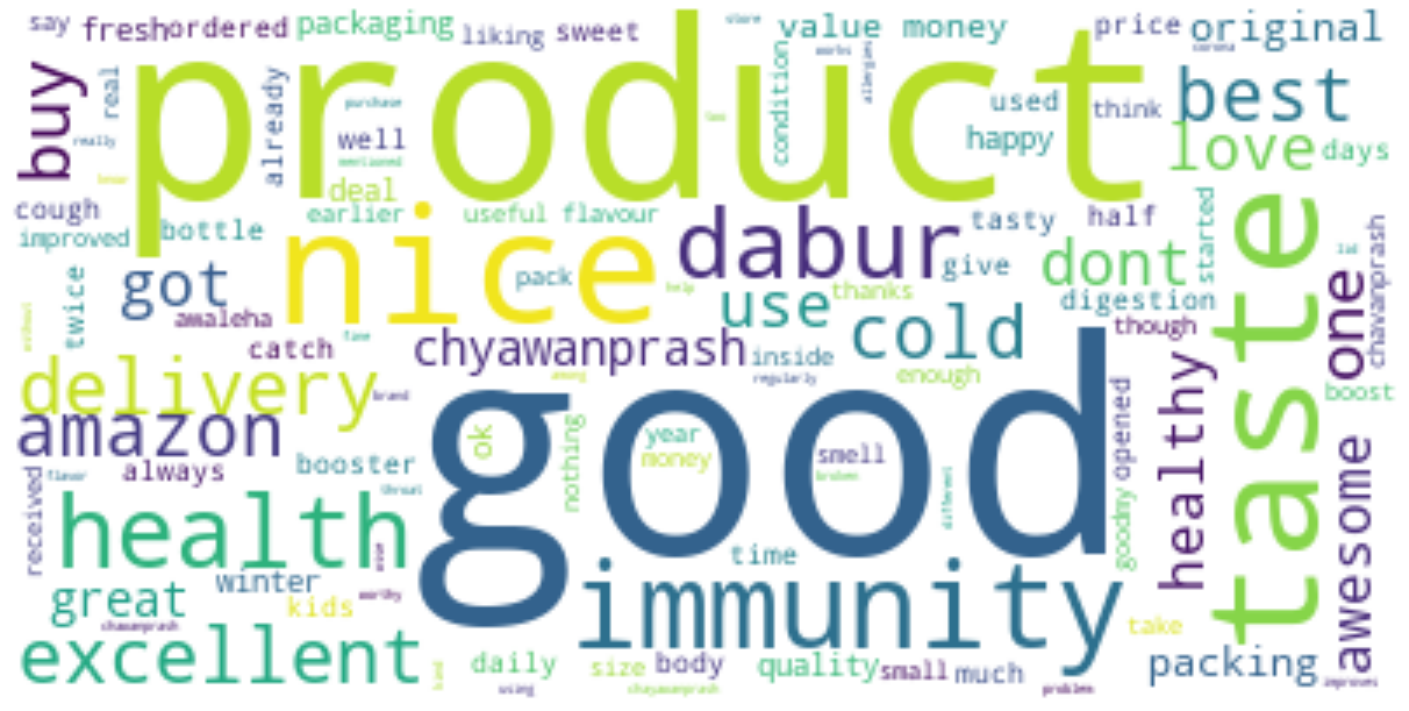

In [21]:
text = " ".join(i for i in data.review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.figure( figsize=(25,25))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## The above word cloud illustrates the keywords in the reviews
Note the presence of predominantly positive words

## Calculating the Sentiment Scores

In [22]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kvpai\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [23]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["review"]]
data = data[["review", "Positive", "Negative", "Neutral"]]
data.head()

review  Positive  Negative  Neutral
0  major impact immunity good immunity winters     0.367       0.0    0.633
1                                         good     1.000       0.0    0.000
2                                  good health     0.744       0.0    0.256
3                                 good product     0.744       0.0    0.256
4                                         good     1.000       0.0    0.000

## Interpretation of the polarity scores:
The interpretation of the polarity/sentiment scores reveals the overall sentiment expressed in the customer reviews, ranging from positive to negative.

In [24]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Overall Positive")
    elif (b>a) and (b>c):
        print("Overall Negative")
    else:
        print("Overall Neutral")
sentiment_score(x, y, z)

Overall Positive


In [25]:
sentiment_percent = [['Positive', round(x/len(data)*100, 3)],
                     ['Negative', round(y/len(data)*100, 3)],
                     ['Neurtal', round(z/len(data)*100, 3)]]
sentiment_res = pd.DataFrame(sentiment_percent, columns=['Sentiment', 'Percentage'])
sentiment_res

Sentiment  Percentage
0  Positive      65.300
1  Negative       1.703
2   Neurtal      32.997

## Create a new dataframe
create a new dataframe with customers who had a bad experience with this product.

In [26]:
data_neg = data[(data['Negative']>data['Positive']) & (data['Negative']>data['Neutral'])]

In [27]:
data_neg.head(30)

review  Positive  Negative  \
73                                                 bad     0.000     1.000   
115              lid container broken find problem use     0.000     0.592   
226  disgusting products poor packaging lid broken ...     0.102     0.548   

     Neutral  
73     0.000  
115    0.408  
226    0.350

create a new dataframe with customers who had a good experience with this product.

In [28]:
data_pos = data[(data['Positive']>data['Negative']) & (data['Positive']>data['Neutral'])]
data_pos.head()

review  Positive  Negative  Neutral
1          good     1.000       0.0    0.000
2   good health     0.744       0.0    0.256
3  good product     0.744       0.0    0.256
4          good     1.000       0.0    0.000
5          good     1.000       0.0    0.000

## Word Cloud: Negative Sentiments in Customer Reviews
This word cloud is created using words extracted from customer reviews with negative sentiment, providing a visual representation of the frequently occurring negative words and phrases. 

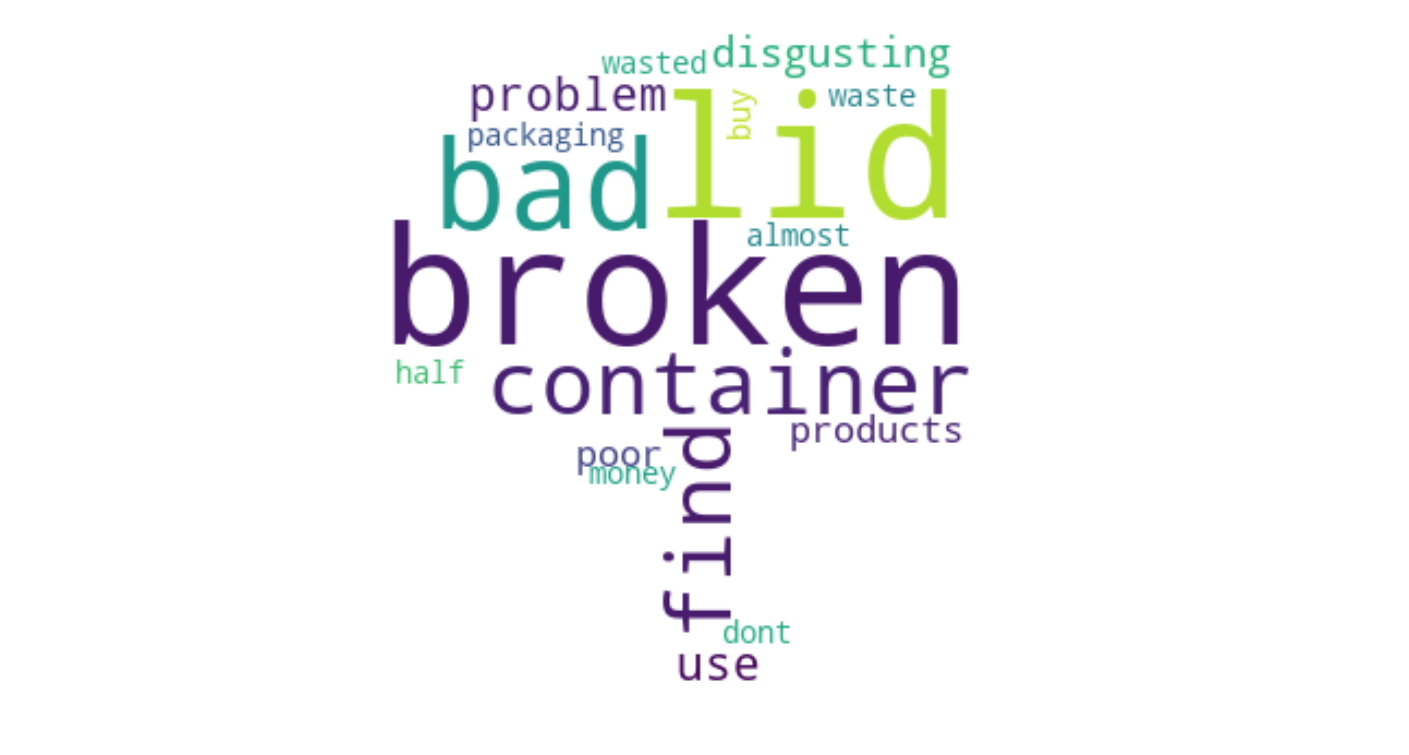

In [29]:
text = " ".join(i for i in data_neg.review)
stopwords = set(STOPWORDS)
mask = np.array(Image.open("assets/thumbs-down.jpg"))
wordcloud = WordCloud(stopwords=stopwords, background_color="white", mask = mask, max_words=250).generate(text)
plt.figure( figsize=(25,25))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Word Cloud: Positive Sentiments in Customer Reviews
This word cloud is generated by extracting words from customer reviews with positive sentiment, offering a visual representation of the frequently occurring positive words and phrases.. 

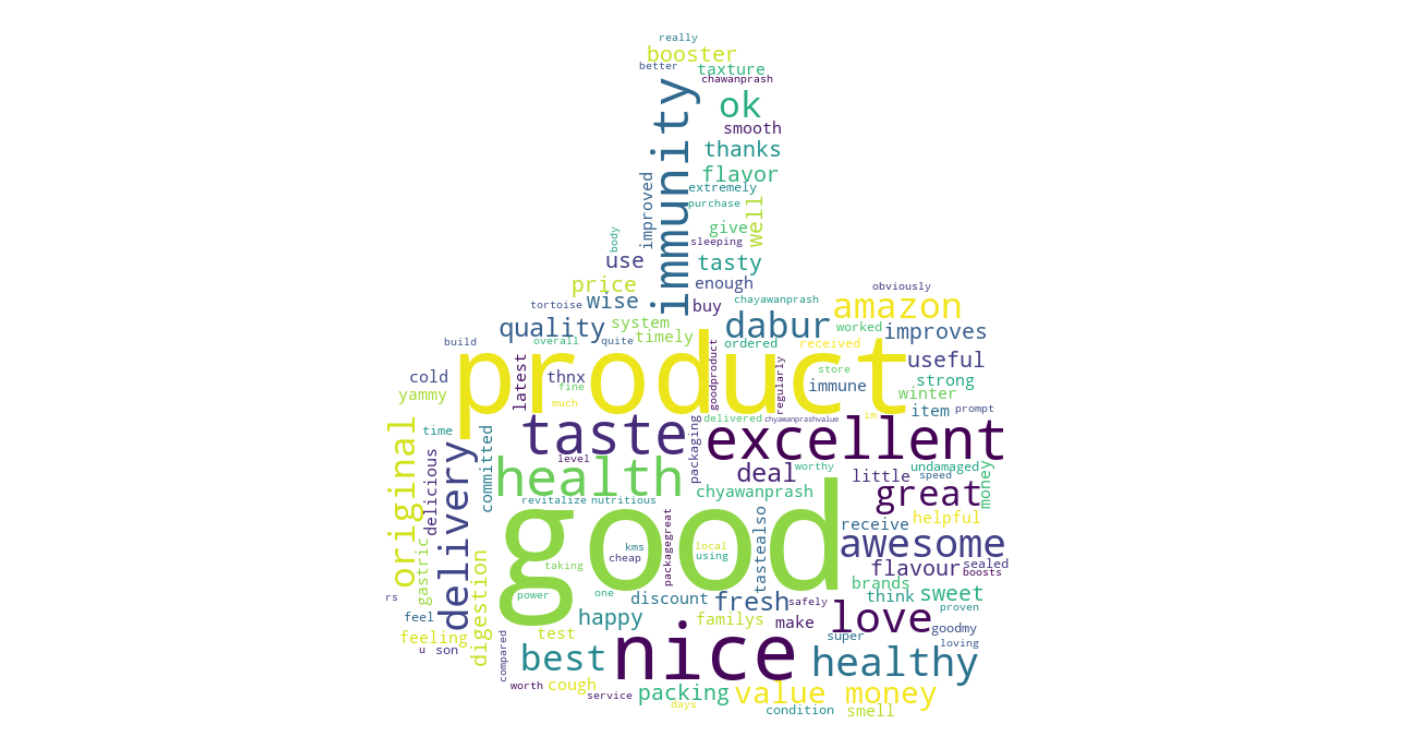

In [30]:
text = " ".join(i for i in data_pos.review)
stopwords = set(STOPWORDS)

mask = np.array(Image.open("assets/thumbs-up.jpg"))

wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=250, mask=mask).generate(text)
plt.figure(figsize=(25,25))
# plt.imshow(wordcloud, interpolation='bilinear')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In conclusion, this Python notebook focused on analyzing customer ratings and sentiments. The data provided valuable insights into customer satisfaction levels, with a majority of customers giving positive ratings. The word cloud visualizations further highlighted the predominant positive or negative sentiments expressed in customer reviews. By understanding the sentiment polarity and analyzing the frequently occurring words, businesses can gain deeper insights into customer experiences and identify areas for improvement. This analysis serves as a valuable tool for enhancing customer satisfaction, making data-driven decisions, and refining products or services based on customer feedback.
